<img style="float: left; margin: 30px 15px 15px 15px;" src="https://oci02.img.iteso.mx/Identidades-De-Instancia/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg" width="500" height="250" /> 
    
    
# <font color='navy'> Homework 3

<font color='black'>

- Luis Fernando Márquez Bañuelos
- Luis Eduardo Jiménez del Muro
- Diego Lozoya Morales

## <font color='cornflowerblue'> Homework 3.1

### Analítico

Dada la fórmula de valor futuro para un interés simple:

$$
\text{VF} = \text{VP} (1 + rt)
$$

Donde:

+ $\text{VF}$: Valor futuro
+ $\text{VP}$: Valor presente
+ $r$: Tasa de interés
+ $t$: tiempo

Realizando el ejercicio donde la tasa de interés $r$ es una variable aleatoria con distribución normal y $\text{VP}$ y  $t$ son constantes:

$$
r \sim \mathcal{N}(\mu, \sigma^2)
$$

De manera analítica podemos estimar el valor esperado de $\text{VF}$:

$$
E[\text{VF}] = E[\text{VP} (1 + rt)]
$$

$$
E[\text{VF}] = E[\text{VP} + rt\text{VP}]
$$

Utilizando las propiedades (1) $E[X + Y] = E[X] + E[Y]$ y (2) $E[aX] = aE[X]$ podemos simplificar la expresión de la siguiente manera:

$$
E[\text{VF}] = E[\text{VP}] + E[rt\text{VP}]]
$$

$$
E[\text{VF}] = \text{VP} + t\text{VP}E[r]
$$

$$
E[\text{VF}] = \text{VP} + \text{VP}\mu t
$$

$$
\boxed{
E[\text{VF}] = \text{VP}(1 + \mu t)
}
$$

Ahora estimando la varianza analíticamente de $\text{VF}$:

$$
\text{Var}[\text{VF}] = \text{Var}[\text{VP} (1 + rt)]
$$

Utilizando las propiedades (3) $\text{Var}[X + Y] = \text{Var}[X] + 2\text{Cov}[X, Y] + \text{Var}[Y]$ y (4) $\text{Var}[aX] = a^2\text{Var}[X]$ podemos simplificar la expresión de la siguiente manera:

$$
\text{Var}[\text{VF}] = \text{VP}^2\text{Var}[(1 + rt)]
$$

$$
\text{Var}[\text{VF}] = \text{VP}^2(\text{Var}[1] + 2\text{Cov}[1, rt] + \text{Var}[rt])
$$

$$
\text{Var}[\text{VF}] = \text{VP}^2(0 + 0 + t^2\text{Var}[r])
$$

$$
\text{Var}[\text{VF}] = \text{VP}^2 t^2 \text{Var}[r]
$$

$$
\boxed{
\text{Var}[\text{VF}] = \text{VP}^2 t^2 \sigma^2
}
$$



### Ejemplo Numérico

Suponiendo:

+ $\text{VP} = 100$
+ $t = 10$ años
+ $r \sim \mathcal{N}(0.09, 0.001)$

$$
E[\text{VF}] = 100(1 + 0.09 \cdot 10) = 190
$$

$$
\text{Var}[\text{VF}] = 100^2 \cdot 10^2 \cdot 0.001 = 1,000
$$


### Simulación en python

In [1]:
import scipy.stats as st
from fitter import Fitter
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import numpy_financial as npf
import numpy as np

In [2]:
vp = 100
t = 10
mu = 0.09
sigma = np.sqrt(0.001)

n_sim = 10**7

r = np.random.normal(mu, sigma, n_sim)
vf = vp * (1 + r * t)

e_vf = np.mean(vf)
var_vf = np.var(vf)

print(f"E[VF]: {e_vf:.4f}")
print(f"Var[VF]: {var_vf:.4f}")

E[VF]: 189.9893
Var[VF]: 999.8547


## <font color='cornflowerblue'> Homework 3.2

In [3]:
# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    DISTRIBUTIONS = [st.norm, st.uniform] #, st.poisson, st.expon]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

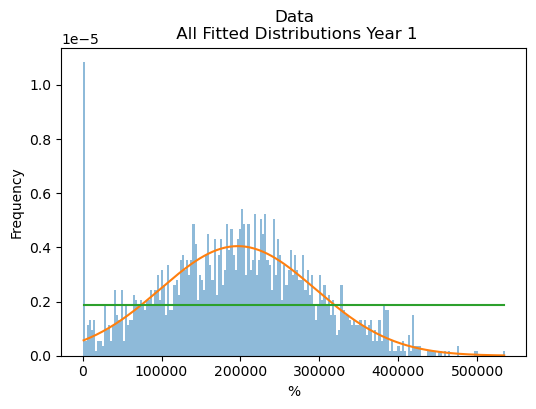

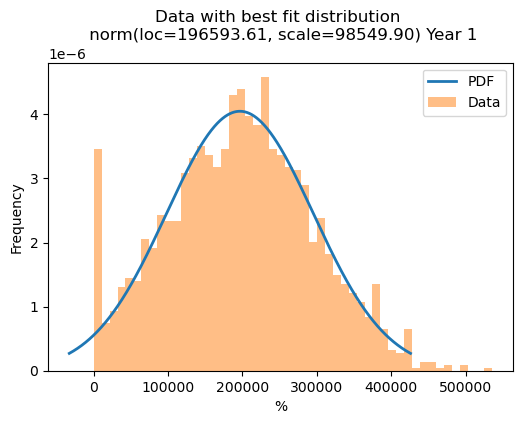

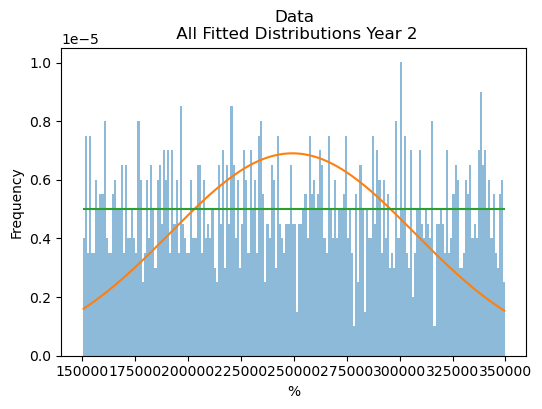

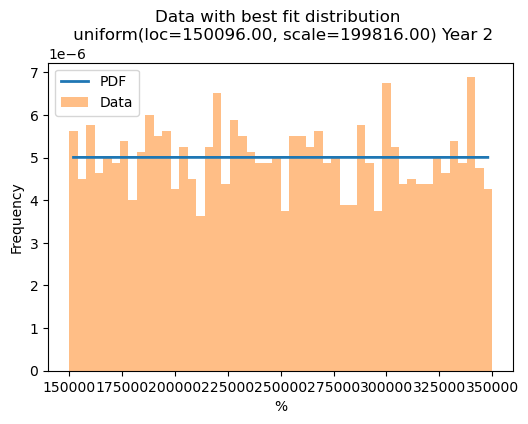

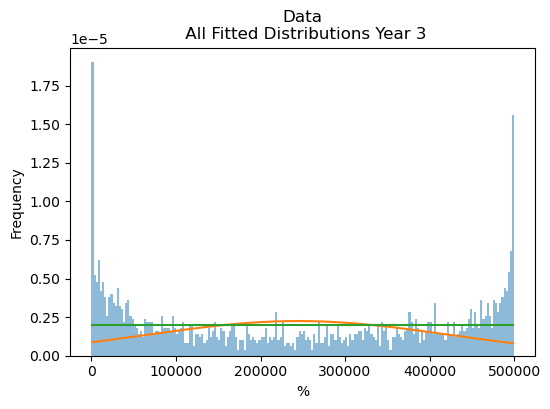

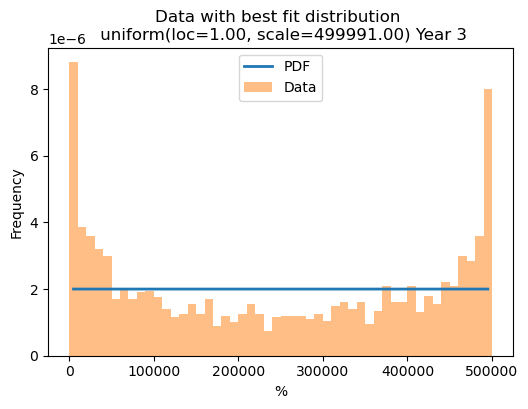

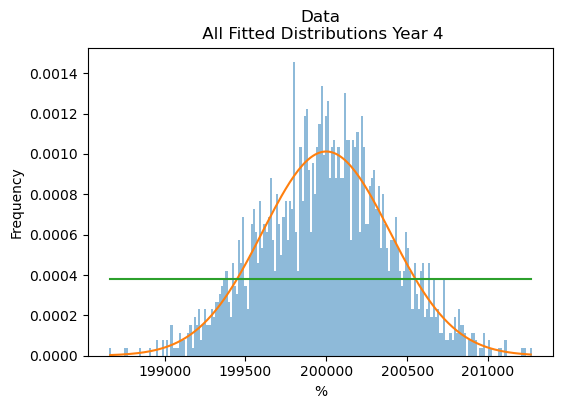

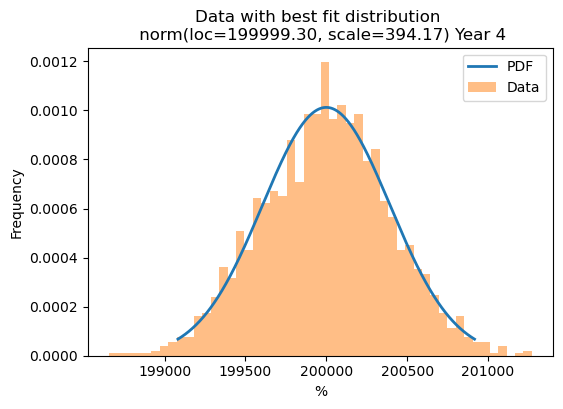

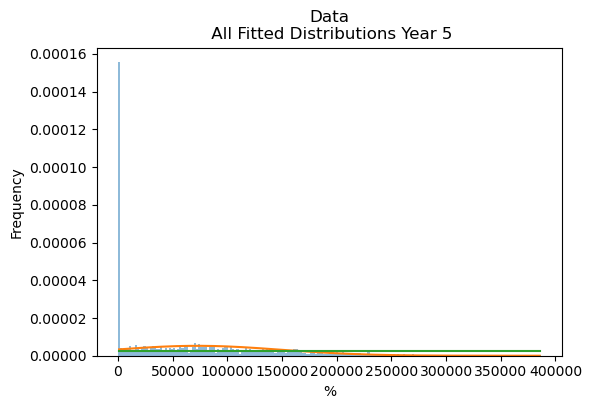

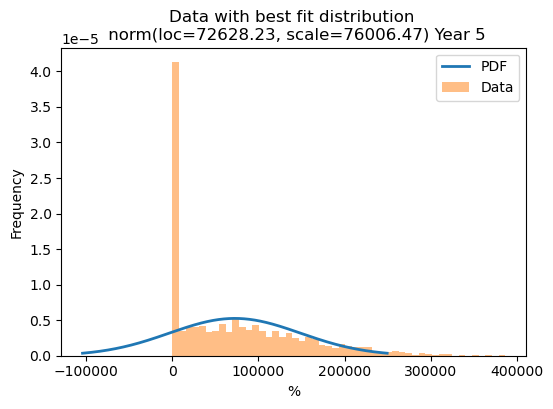

In [4]:
RawData = pd.read_csv('Data/Data_OilCompany.csv')

years = [0, 1, 2, 3, 4]
params_values = []

for year in years:
    data = RawData.iloc[:, year]

    plt.figure(figsize=(6,4))
    ax = data.plot(kind='hist', bins=200, density=True, alpha=0.5)
    dataYLim = ax.get_ylim()
    best_fit_name, best_fit_params = best_fit_distribution(data, 200, ax)
    best_dist = getattr(st, best_fit_name)
    params_values.append(best_fit_params)

    ax.set_ylim(dataYLim)
    ax.set_title(f'Data\n All Fitted Distributions Year {year + 1}')
    ax.set_xlabel(u'%')
    ax.set_ylabel('Frequency')

    pdf = make_pdf(best_dist, best_fit_params)
    
    plt.figure(figsize=(6,4))
    ax = pdf.plot(lw=2, label='PDF', legend=True)
    data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

    param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
    param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
    dist_str = '{}({})'.format(best_fit_name, param_str)

    ax.set_title(f'Data with best fit distribution \n {dist_str} Year {year + 1}')
    ax.set_xlabel(u'%')
    ax.set_ylabel('Frequency')
    plt.show()

In [5]:
mean_year1 = params_values[0][0]
var_year_1 = (params_values[0][1]) ** 2

print(f'Media Year 1: {mean_year1:,.2f}, Varianza Year 1: {var_year_1:,.2f}')

Media Year 1: 196,593.61, Varianza Year 1: 9,712,083,463.50


In [6]:
mean_year2 = (RawData['  Year 2  '].max() + RawData['  Year 2  '].min()) / 2
var_year_2 = (RawData['  Year 2  '].max() - RawData['  Year 2  '].min())**2 / 12

print(f'Media Year 2: {mean_year2:,.2f}, Varianza Year 2: {var_year_2:,.2f}')

Media Year 2: 250,004.00, Varianza Year 2: 3,327,202,821.33


In [7]:
mean_year3 = (RawData['  Year 3  '].max() + RawData['  Year 3  '].min()) / 2
var_year_3 = (RawData['  Year 3  '].max() - RawData['  Year 3  '].min())**2 / 12

print(f'Media Year 3: {mean_year3:,.2f}, Varianza Year 3: {var_year_3:,.2f}')

Media Year 3: 249,996.50, Varianza Year 3: 20,832,583,340.08


In [8]:
mean_year4 = params_values[3][0]
var_year_4 = (params_values[3][1]) ** 2

print(f'Media Year 4: {mean_year4:,.2f}, Varianza Year 4: {var_year_4:,.2f}')

Media Year 4: 199,999.30, Varianza Year 4: 155,371.31


In [9]:
mean_year5 = params_values[4][0]
var_year_5 = (params_values[4][1]) ** 2

print(f'Media Year 5: {mean_year5:,.2f}, Varianza Year 5: {var_year_5:,.2f}')

Media Year 5: 72,628.23, Varianza Year 5: 5,776,983,493.55


### **What are the expected product sales for year 1 and year 2? (Use ML code)**

$E[y_1+y_2] = E[y_1] + E[y_2]$

In [10]:
print(f'Expected sales for year 1 and year 2: {(mean_year1 + mean_year2):,.4f}')

Expected sales for year 1 and year 2: 446,597.6140


### **What the Expected Value and Var of IRR and NPV? ( Use code from Homework 1. and ML code)**

In [11]:
def NPV(df_units: pd.DataFrame, rf: float, initial_cost: float) -> pd.DataFrame:
    
    df_flows = (5-0.8) * df_units - 40_000
    t = np.linspace(1, len(df_flows.columns), len(df_flows.columns))

    npv = [(np.sum(df_flows.iloc[i] / (1+rf)**t) - initial_cost) for i in range(len(df_flows))]
    irr = [npf.irr(np.concatenate(([-initial_cost], df_flows.iloc[i].values))) for i in range(len(df_flows))]

    return pd.DataFrame({'IRR': irr, 'NPV': npv})

In [12]:
rf = 0.03
initial_cost = 1_800_000

df_units_full = pd.read_csv('Data/Data_OilCompany.csv')
df = NPV(df_units_full, rf, initial_cost)
df.head()

,IRR,NPV
0,0.508144,2.841295e+06
1,0.272260,9.256289e+05
2,0.166964,7.532422e+05
3,0.435260,1.850074e+06
4,0.591007,3.233719e+06


In [13]:
params = []

for i in df.columns:

    dist= ['uniform', "norm"]
    f = Fitter(df[i],distributions=dist)
    f.fit()
    #f.summary()
    params.append(f.get_best())
    print(f.get_best())

2025-09-08 13:00:32.946 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=76.013313)
2025-09-08 13:00:32.960 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=5.596107)


{'norm': {'loc': 0.35925744714118407, 'scale': 0.15477616887962362}}
{'norm': {'loc': 1754930.8721101417, 'scale': 871671.796594415}}


2025-09-08 13:00:33.842 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.0)
2025-09-08 13:00:33.843 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=0.0)


In [14]:
irr_params = next(iter(params[0].values()))
npv_params = next(iter(params[1].values()))

print(f'Expected IRR: {irr_params["loc"]:,.4f}, Var IRR: {irr_params["scale"] ** 2:,.4f}')
print(f'Expected NPV: {npv_params["loc"]:,.4f}, Var NPV: {npv_params["scale"] ** 2:,.4f}')

Expected IRR: 0.3593, Var IRR: 0.0240
Expected NPV: 1,754,930.8721, Var NPV: 759,811,720,978.1351


### **What the expected NPV and VAR for NPV? (Use ML code on each year sales and answer analytically)**

El NPV se obtiene de la siguiente manera:

$$NPV = - Inv + \sum_{i=1}^n (\frac{(P - C)y_i - Fix}{(1 + r)^{i}})$$

donde:

- $Inv$ representa la inversión inicial
- $P$ representa el precio
- $C$ representa el costo de producción
- $y_t$ representa la cantidad de unidades de venta en el tiempo $i$
- $Fix$ representa el costo fijo
- $r$ representa la tasa libre de riesgo

En el contexto del problema, se aplica esperanza para conocer el valor esperado de toda la expresión

$$E[NPV] = E[- Inv + \sum_{i=1}^5 (\frac{(P - C)y_i - Fix}{(1 + r)^{i}})]$$

Con ayuda de la propiedad $E[a + b] = E[a] + E[b]$

$$E[NPV] = - E[Inv] + E[\sum_{i=1}^5(\frac{(P - C)y_i - Fix}{(1 + r)^{i}})]$$

Usando la propiedad $E[c \times x] = c \times E[x]$ y sabiendo que la única variable aleatoria es las unidades de venta

$$E[NPV] = - Inv + \sum_{i=1}^5 (\frac{(P - C)E[y_i] - Fix}{(1 + r)^{i}})$$

Con base en el valor de las variables

- $Inv = 1,800,000$
- $P = 5$
- $C = 0.8$
- $Fix = 40,000$
- $r = 3\%$
- $E[y_i] = \text{El valor esperado calculado de cada año de unidades de venta, con base en su distribución}$

Se puede expandir la sumatoria y resolver la esperanza del NPV

$$
E[NPV] =
- 1,800,000 +
\frac{(4.2) \times 196,593.61 - 40,000}{1.03^1} +
\frac{(4.2) \times 250,004    - 40,000}{1.03^2} +
\frac{(4.2) \times 249,996.5  - 40,000}{1.03^3} +
\frac{(4.2) \times 199,999.3  - 40,000}{1.03^4} +
\frac{(4.2) \times  72,628.23 - 40,000}{1.03^5}
$$

$$\boxed{E[NPV] = 1,778,537.84}$$

De manera similar se aplica el mismo proceso, pero ahora para encontrar la varianza

$$Var[NPV] = Var[- Inv + \sum_{i=1}^5 (\frac{(P - C)y_i - Fix}{(1 + r)^{i}})]$$

Con ayuda de la propiedad $Var[a + b] = Var[a] + 2Cov[a, b] + Var[b]$

$$Var[NPV] = - Var[Inv] + 2Cov(Inv, \sum_{i=1}^5(\frac{(P - C)y_i - Fix}{(1 + r)^{i}})) + Var[\sum_{i=1}^5(\frac{(P - C)y_i - Fix}{(1 + r)^{i}})]$$

Usando las propiedades $Var[c] = 0$ y $Var[c \times x] = c^2 \times Var[x]$

$$Var[NPV] = 0 + 0 +\sum_{i=1}^5(Var[\frac{(P - C)y_i}{(1 + r)^{i}}])$$

$$Var[NPV] = \sum_{i=1}^5((\frac{(P - C)}{(1 + r)^{i}})^2 Var[y_i])$$

Con base en el valor de las variables

- $P = 5$
- $C = 0.8$
- $r = 3\%$
- $Var[y_i] = \text{La varianza calculada de cada año de unidades de venta, con base en su distribución}$

Se puede expandir la sumatoria y resolver la varianza del NPV

$$
Var[NPV] =
(\frac{4.2}{1.03^1})^2 \times  9,712,083,464.5  +
(\frac{4.2}{1.03^2})^2 \times  3,327,202,821.33 +
(\frac{4.2}{1.03^3})^2 \times 20,832,583,340.08 +
(\frac{4.2}{1.03^4})^2 \times        155,371.31 +
(\frac{4.2}{1.03^5})^2 \times  5,776,983,494.55
$$

$$\boxed{Var[NPV] = 597,227,747,000}$$

### **Estimate the PDF of NPV and IRR answer analytically: (Consider PDF found in question 2)**

1. What the probability that the IRR is over the Risk free rate?

$$P(X>0.03) = P(z>\frac{0.03 - 0.3593}{0.1548}) = P(z>-2.1280) = 0.9833 = 98.33\%$$

2. What the probability that the IRR is over the 35%?

$$P(X>0.35) = P(z>\frac{0.35 - 0.3593}{0.1548}) = P(z>-0.0595) = 0.5237 = 52.37\%$$

3. What the probability that the project value is over $2M?

$$P(X>2,000,000) = P(z>\frac{2,000,000 - 1,754,930.8721}{871,671.7966}) = P(z>-0.2811) = 0.3893 = 38.93\%$$

4. What’s the probability that the IRR is between 10% and 20%?

$$P(0.1<X<0.2) = P(\frac{0.1 - 0.3593}{0.1548}<z<\frac{0.2 - 0.3593}{0.1548}) = P(-1.6755<z<-1.0291) = 0.1048 = 10.48\%$$

5. Do you get same responses as in Homework 1.1?

     Aunque las respuestas son similares no llegan a ser del todo iguales
